# 逻辑回归

## 1. 什么是逻辑回归

逻辑回归（Logistic Regression）也是机器学习一个最基本也是最常用的算法模型。与线性回归不同的是，逻辑回归主要用于对样本进行分类。因此，逻辑回归的输出是离散值。对于二分类问题，通常我们令正类输出为1，负类输出为0。例如一个心脏病预测的问题：根据患者的年龄、血压、体重等信息，来预测患者是否会有心脏病，这就是典型的逻辑回归问题。

二元分类，一般情况下，理想的目标函数$f(x)\geq0.5$，则判断为正类1；若$f(x)<0.5$，则判断为负类0。

- $f(x)\geq0.5$：$\hat y=1$

- $f(x)<0.5$：$\hat y=0$

## 2. 得分函数

与线性回归类似，令逻辑回归的输入为x，维度为（m，k）。其中，m为样本个数，k为输入特征维度。输出为y，维度为（m，1）。引入参数$w_0,w_1,\cdots,w_{k}$，计算线性回归的得分函数（score function）为：

$$s=w_0x_0+w_1x_1+\cdots+w_kx_k$$

但是这里得到的$s$是连续输出，范围为整个实数，无法应用与分类问题。方法是对得分函数$s$再处理，利用Sigmoid函数将数值限定在[0,1]之间。

## 3. Sigmoid函数

Sigmoid函数的表达式为：

$$\theta(s)=\frac{1}{1+e^{-s}}$$

相应的函数图形为：

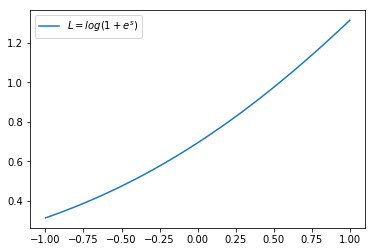

In [16]:
e = 0.01
s = np.linspace(-1, 1, 100)
h = np.log(1+np.exp(s))

plt.plot(s, h, label=r'$L=log(1+e^{s})$')
plt.legend()

plt.show()

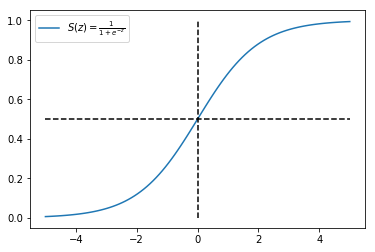

In [2]:
import numpy as np
import matplotlib.pyplot as plt

s = np.linspace(-5,5,100)
h = 1/(1+np.exp(-s))

plt.plot(s, h, label=r'$S(z)=\frac{1}{1+e^{-z}}$')
plt.legend()
plt.plot([-5,5],[0.5,0.5],'k--')
plt.plot([0,0],[0,1],'k--')
plt.show()

![](img/../1.png)

根据之前计算得到的得分函数$s$（即$\hat y$），若$s$很大，则$\theta(s)\approx 1$；若$s$很小，则$\theta(s)\approx 0$。通常来说，$\theta(s)$与0.5比较，决定预测输出，从而进行分类。

- $\theta(s)\geq 0.5$：正类

- $\theta(s)<0.5$：负类

## 4. 代价函数

逻辑回归的代价函数（Cost Function）一般采用交叉熵（Cross-entropy Error）。常用的交叉熵形式为：

$$J=-\frac1m\sum_{i=1}^m[y^{(i)}log\hat y^{(i)}+(1-y^{(i)})log(1-\hat y^{(i)})]$$

上式中，$m$表示训练样本个数，$y^{(i)}$表示第$i$个样本真实标签，取值0或1，$\hat y^{(i)}$表示第$i$个样本的预测输出，取值范围在(0,1)之间。

其实，对于交叉熵的解释非常简单。分为两种情况：

- 当$y=1$时，$J=-\frac1m\sum_{i=1}^mlog\hat y^{(i)}$

此时，$J$的曲线类似于下图：

![](img/../2.png)

通过上图可以很清楚看到，当$\hat y=1$时，$J\approx0$；当$\hat y=0$时，$J\approx\infty$。由于该情况下，真实样本$y=1$，$J$的曲线正好与我们期望的一致，即$\hat y$越接近1，损失函数$J$越小。

- 当$y=0$时，$J=-\sum_{(i=1)}^mlog(1-\hat y^{(i)})$

此时，$J$的曲线类似于下图：

![](img/../3.png)

显然，当$\hat y=1$时，$J\approx\infty$；当$\hat y=0$时，$J\approx0$。该情况下，真实样本$y=0$，$J$的曲线正好与我们期望的一致，即$\hat y$越接近0，损失函数$J$越小。

综上所述，代价函数$J$的数学表达式能够很好地反映$\hat y$与$y$之间的偏差程度，偏差越大，“惩罚”越大！

## 5. 偏导数

代价函数$J$的表达式为：

$$J=-\frac1m\sum_{i=1}^m[y^{(i)}log\hat y^{(i)}+(1-y^{(i)})log(1-\hat y^{(i)})]$$

将$\hat y=\theta(s)$，$s=w_0x_0+w_1x_1+\cdots+w_kx_k$代入，并写出矩阵形式：

$$J=-\frac1m[Ylog\theta(XW)+(1-Y)log(1-\theta(XW)]$$

其中，矩阵$W$是待求参数，计算$J$对$W$的偏导数：

$$\frac{\partial J}{\partial W}=\frac{\partial J}{\partial\theta(XW)}\cdot\frac{\partial\theta(XW)}{\partial W}=\frac1m \frac{\theta(XW)-Y}{\theta(XW)(1-\theta(XW))}\cdot X^T\theta(XW)(1-\theta(XW))=\frac1m X^T(Y-\theta(XW))=\frac1m X^T(Y-\hat Y)$$

推导过程并不复杂，只需记住$J$对$W$的偏导数为$\frac1m X^T(Y-\hat Y)$就好了。

得到偏导数之后，我们就能写出参数$W$的更新公式了：

$$W=W-\eta\frac{\partial J}{\partial W}$$

其中，$\eta$是学习因子，即步进长度。

## 6. 逻辑回归实例

### 数据准备

数据集我已经存放在'../data/'目录下，该数据集包含了100个样本，正负样本各50，特征维度为2。

In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv('./data.csv', header=None)
# 样本输入，维度（100，2）
X = data.iloc[:,:2].values
m = X.shape[0]    # 样本个数
# 样本输出，维度（100，）
y = data.iloc[:,2].values.reshape((m,1))

下面我们在二维平面上绘出正负样本的分布情况。

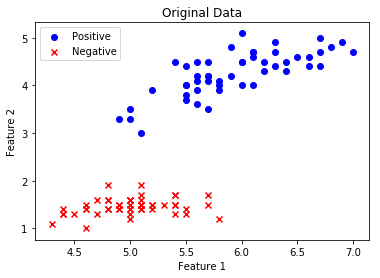

In [33]:
import matplotlib.pyplot as plt

plt.scatter(X[:50, 0], X[:50, 1], color='blue', marker='o', label='Positive')
plt.scatter(X[50:, 0], X[50:, 1], color='red', marker='x', label='Negative')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.title('Original Data')
plt.show()

### 特征归一化

首先分别对两个特征进行归一化处理，即：

$$X=\frac{X-\mu}{\sigma^2}$$

其中，$\mu$是特征均值，$\sigma^2$是特征方差。

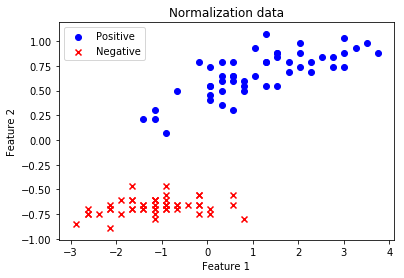

In [34]:
# 均值
u = np.mean(X, axis=0)
# 方差
v = np.var(X, axis=0)

X = (X - u) / v

# 作图
plt.scatter(X[:50, 0], X[:50, 1], color='blue', marker='o', label='Positive')
plt.scatter(X[50:, 0], X[50:, 1], color='red', marker='x', label='Negative')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.title('Normalization data')
plt.show()

### 初始化

In [35]:
# X加上偏置项
X = np.hstack((np.ones((X.shape[0],1)), X))
# 权重初始化
W = np.random.randn(3,1)
N = 1000     # 迭代次数
lr = 0.2    # 学习因子

### 迭代更新训练

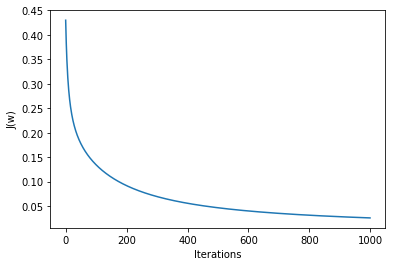

In [36]:
J_history = []    # 存放代价函数值
for i in range(N):
    s = np.dot(X,W)
    h = 1 / (1 + np.exp(-s))
    J = -1 / m * np.sum(y * np.log(h) + (1 - y) * np.log(1-h))
    J_history.append(J)
    dW = 1 / m * np.dot(X.T, h - y)
    W = W - lr * dW

# 绘制代价函数J_history变化
plt.plot(J_history)
plt.xlabel('Iterations')
plt.ylabel('J(w)')
plt.show()

通过J_history发现代价函数是逐渐减小的，在迭代次数接近1000的时候，$J(w)$已经取得了比较小的值了。

最后，我们来看一下逻辑回归的分类正确率：

In [47]:
s = np.dot(X, W)
p = 1 / (1 + np.exp(-s))
y_pred[p >= 0.5] = 1        # 预测正类
y_pred[p < 0.5] = 0         # 预测负类
accuracy = np.mean(y_pred == y)
print('分类正确率：%2f' % accuracy)

分类正确率：1.000000


可见逻辑回归分类算法，完全正确地将正负样本分开来了。

## 7. 总结

逻辑回归（Logistic Regression）与线性回归（Linear Regression）类似，但逻辑回归处理的是分类问题。利用了Sigmoid函数，根据极大似然原理构造了对应的代价函数。逻辑回归是一种最基本的分类算法之一。